In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
import seaborn as sns
sns.set(style="ticks")


pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
sns.set(style="ticks")
%matplotlib inline


import seaborn as sns
pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', 100)
pd.set_option('max_rows',100)
sns.set_context('poster') 

#### Data Set: FD001
Train trjectories: 100

Test trajectories: 100

Conditions: ONE (Sea Level)

Fault Modes: ONE (HPC Degradation)

------------------------------------------------------------------------------------------------------
#### Data Set: FD002
Train trjectories: 260

Test trajectories: 259

Conditions: SIX 

Fault Modes: ONE (HPC Degradation)

------------------------------------------------------------------------------------------------------

#### Data Set: FD003

Train trjectories: 100

Test trajectories: 100

Conditions: ONE (Sea Level)

Fault Modes: TWO (HPC Degradation, Fan Degradation)

------------------------------------------------------------------------------------------------------

#### Data Set: FD004

Train trjectories: 248

Test trajectories: 249

Conditions: SIX 

Fault Modes: TWO (HPC Degradation, Fan Degradation)

------------------------------------------------------------------------------------------------------
#### Experimental Scenario

Data sets consists of multiple multivariate time series. Each data set is further divided into training and test subsets. Each time series is from a different engine – i.e., the data can be considered to be from a fleet of engines of the same type. Each engine starts with different degrees of initial wear and manufacturing variation which is unknown to the user. This wear and variation is considered normal, i.e., it is not considered a fault condition. There are three operational settings that have a substantial effect on engine performance. These settings are also included in the data. The data is contaminated with sensor noise.

The engine is operating normally at the start of each time series, and develops a fault at some point during the series. In the training set, the fault grows in magnitude until system failure. In the test set, the time series ends some time prior to system failure. The objective of the competition is to predict the number of remaining operational cycles before failure in the test set, i.e., the number of operational cycles after the last cycle that the engine will continue to operate. Also provided a vector of true Remaining Useful Life (RUL) values for the test data.

The data are provided as a zip-compressed text file with 26 columns of numbers, separated by spaces. Each row is a snapshot of data taken during a single operational cycle, each column is a different variable. The columns correspond to:

1)	unit number

2)	time, in cycles

3)	operational setting 1

4)	operational setting 2

5)	operational setting 3

6)	sensor measurement  1

7)	sensor measurement  2

...

26)	sensor measurement  26

The **training set** includes operational data from 100 different engines. In each data set, the engine was run for a variable number of cycles until failure. The lengths of the run varied with a minimum run length of 128 cycles and the maximum length of 356 cylces.

The **testing set** includes operational data from 100 different engines. The engines in the test dataset and copletely different from engines in the training data set.


In [2]:
# Input files don't have column names
dependent_var = ['RemainingUsefulLife']
index_columns_names =  ["UnitNumber","Cycle"]
operational_settings_columns_names = ["OpSet"+str(i) for i in range(1,4)]
sensor_measure_columns_names =["SensorMeasure"+str(i) for i in range(1,22)]
input_file_column_names = index_columns_names + operational_settings_columns_names + sensor_measure_columns_names

In [3]:
df_train=pd.read_csv('train_FD001.txt',delim_whitespace=True,names=input_file_column_names)
df_train.shape

(20631, 26)

The data has 20631 observations and 26 columns

In [4]:
df_train.head()

UnitNumber  Cycle  OpSet1  OpSet2  OpSet3  SensorMeasure1  SensorMeasure2  SensorMeasure3  SensorMeasure4  SensorMeasure5  SensorMeasure6  SensorMeasure7  SensorMeasure8  SensorMeasure9  SensorMeasure10  SensorMeasure11  SensorMeasure12  SensorMeasure13  SensorMeasure14  SensorMeasure15  SensorMeasure16  SensorMeasure17  SensorMeasure18  SensorMeasure19  SensorMeasure20  SensorMeasure21
0           1      1 -0.0007 -0.0004   100.0          518.67          641.82         1589.70         1400.60           14.62           21.61          554.36         2388.06         9046.19              1.3            47.47           521.66          2388.02          8138.62           8.4195             0.03              392             2388            100.0            39.06          23.4190
1           1      2  0.0019 -0.0003   100.0          518.67          642.15         1591.82         1403.14           14.62           21.61          553.75         2388.04         9044.07              1.3            47.49           522.28          2388.07          8131.49           8.4318             0.03              392             2388            100.0            39.00          23.4236
2           1      3 -0.0043  0.0003   100.0          518.67          642.35         1587.99         1404.20           14.62           21.61          554.26         2388.08         9052.94              1.3            47.27           522.42          2388.03          8133.23           8.4178             0.03              390             2388            100.0            38.95          23.3442
3           1      4  0.0007  0.0000   100.0          518.67          642.35         1582.79         1401.87           14.62           21.61          554.45         2388.11         9049.48              1.3            47.13           522.86          2388.08          8133.83           8.3682             0.03              392             2388            100.0            38.88          23.3739
4           1      5 -0.0019 -0.0002   100.0          518.67          642.37         1582.85         1406.22           14.62           21.61          554.00         2388.06         9055.15              1.3            47.28           522.19          2388.04          8133.80           8.4294             0.03              393             2388            100.0            38.90          23.4044

In [5]:
#creating a dataframe of total life of the component
rul_unitno=[max(df_train.query('UnitNumber=='+str(i)).Cycle) for i in range(1,101)]

In [6]:
t_minus_temp=[df_train.query('UnitNumber=='+str(i)).Cycle.values-rul_unitno[i-1] for i in range(1,101)]
t_minus_list=[j for i in t_minus_temp for j in i]

In [7]:
df_train=df_train.assign(t_minus=t_minus_list)
df_train.head()

UnitNumber  Cycle  OpSet1  OpSet2  OpSet3  SensorMeasure1  SensorMeasure2  SensorMeasure3  SensorMeasure4  SensorMeasure5  SensorMeasure6  SensorMeasure7  SensorMeasure8  SensorMeasure9  SensorMeasure10  SensorMeasure11  SensorMeasure12  SensorMeasure13  SensorMeasure14  SensorMeasure15  SensorMeasure16  SensorMeasure17  SensorMeasure18  SensorMeasure19  SensorMeasure20  SensorMeasure21  t_minus
0           1      1 -0.0007 -0.0004   100.0          518.67          641.82         1589.70         1400.60           14.62           21.61          554.36         2388.06         9046.19              1.3            47.47           521.66          2388.02          8138.62           8.4195             0.03              392             2388            100.0            39.06          23.4190     -191
1           1      2  0.0019 -0.0003   100.0          518.67          642.15         1591.82         1403.14           14.62           21.61          553.75         2388.04         9044.07              1.3            47.49           522.28          2388.07          8131.49           8.4318             0.03              392             2388            100.0            39.00          23.4236     -190
2           1      3 -0.0043  0.0003   100.0          518.67          642.35         1587.99         1404.20           14.62           21.61          554.26         2388.08         9052.94              1.3            47.27           522.42          2388.03          8133.23           8.4178             0.03              390             2388            100.0            38.95          23.3442     -189
3           1      4  0.0007  0.0000   100.0          518.67          642.35         1582.79         1401.87           14.62           21.61          554.45         2388.11         9049.48              1.3            47.13           522.86          2388.08          8133.83           8.3682             0.03              392             2388            100.0            38.88          23.3739     -188
4           1      5 -0.0019 -0.0002   100.0          518.67          642.37         1582.85         1406.22           14.62           21.61          554.00         2388.06         9055.15              1.3            47.28           522.19          2388.04          8133.80           8.4294             0.03              393             2388            100.0            38.90          23.4044     -187

Here, a new column t_minus is made because we know when each engine in the training set will fail, we can compute a “time before failure” value at each time step, defined as an engine’s elapsed life at that time minus its total lifetime. This number is a sort of countdown to failure for each engine, and it allows us to align different engines’ data to a common end point. The figure below shows the sensor channels from the same engines as the previous figure, now plotted against their time before failure. Note that each engine now ends at the same instant (t=0), as indicated by the red line.

Aligning the data in this way allows us to observe some patterns. For instance, we see that some sensor readings consistently rise or fall right before a failure, while others (e.g. sensor 14) exhibit different failure behavior across different engines. This illustrates a subtle yet important aspect of many predictive maintenance problems: failure is often a confluence of different processes, and as a result, “things” in the real world are likely to exhibit multiple failure modes.

### Plotting Operational Setting

In our data set, each engine operates under slightly different conditions, characterized by three dimensions which change over time (e.g. altitude or external air pressure). The figure below shows the values of these operational conditions over time for the same example engine.



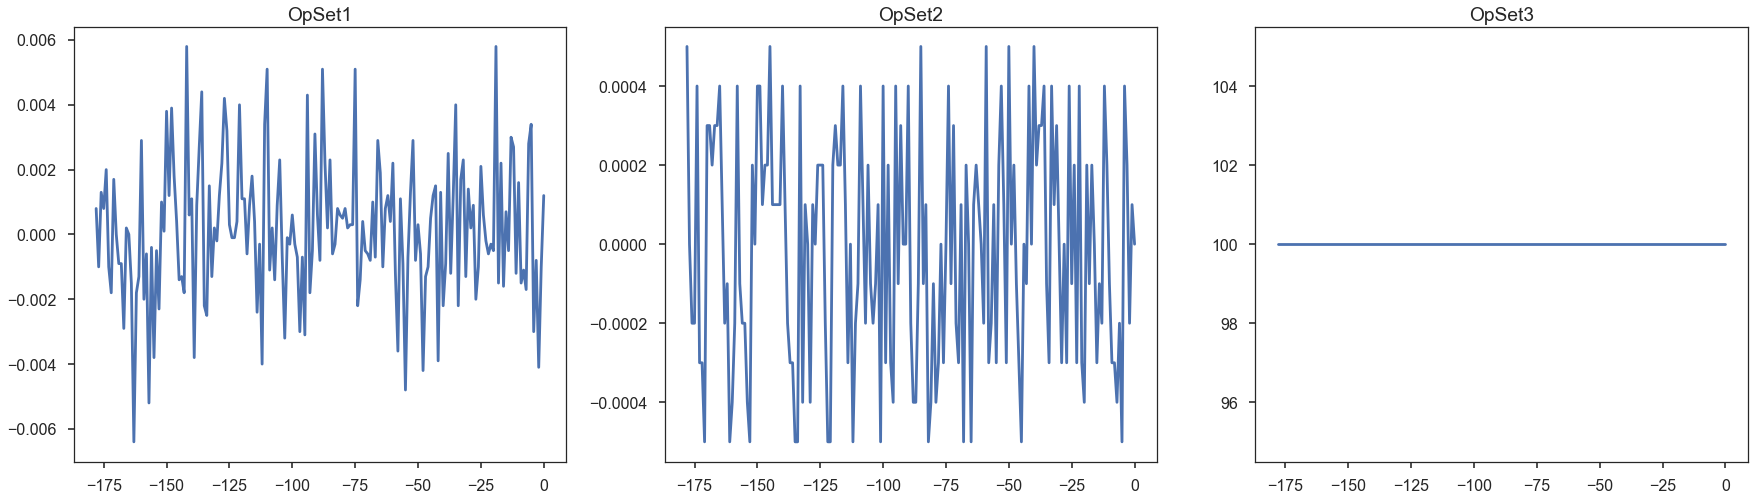

In [8]:
fig,ax=plt.subplots(1,3,figsize=(30,8),sharex='all')
for i in range(0,3):
    df_u1=df_train.query('UnitNumber==3')
    ax[i].plot(df_u1.t_minus.values, df_u1['OpSet'+str(i+1)])
    ax[i].set_title('OpSet'+str(i+1))

### Plotting the Sensor Measurements

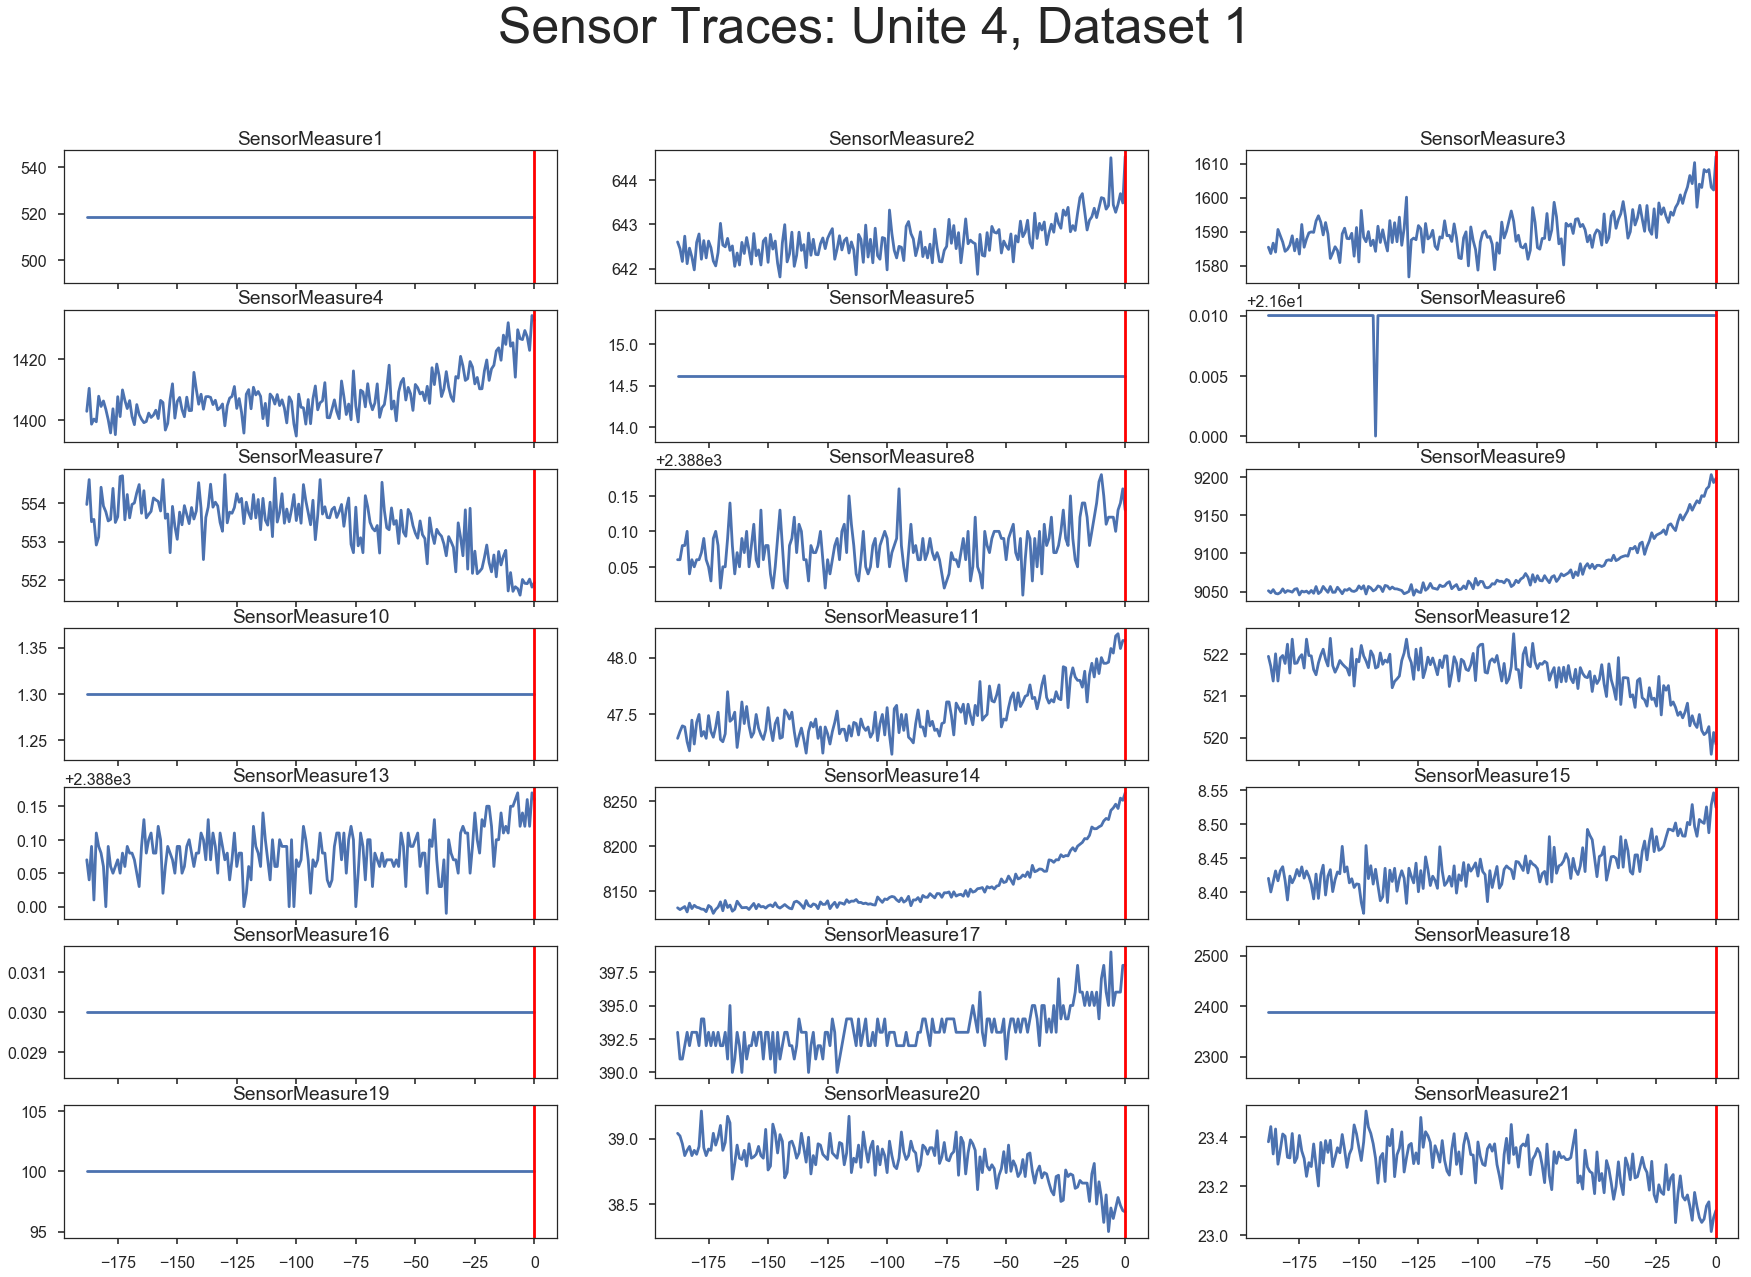

In [9]:
fig,ax=plt.subplots(7,3,figsize=(30,20),sharex=True)
df_u1=df_train.query('UnitNumber==4')
c=0
for i in range(0,7):
    for j in range(0,3):
        ax[i,j].plot(df_u1.t_minus.values, df_u1['SensorMeasure'+str(c+1)])
        ax[i,j].set_title('SensorMeasure'+str(c+1))
        ax[i,j].axvline(0,c='r')
        c+=1
plt.suptitle('Sensor Traces: Unite 4, Dataset 1',fontsize=50)
plt.show()

The figure above shows the readings from the sensors on a single engine in the data set. Each of the sensors measures something about the physical state of the engine, like the temperature of a component or the speed of a fan. Notice that some sensor channels are quite noisy and appear to increase or decrease over time, while others don’t appear to change at all.

### Sensor Selection

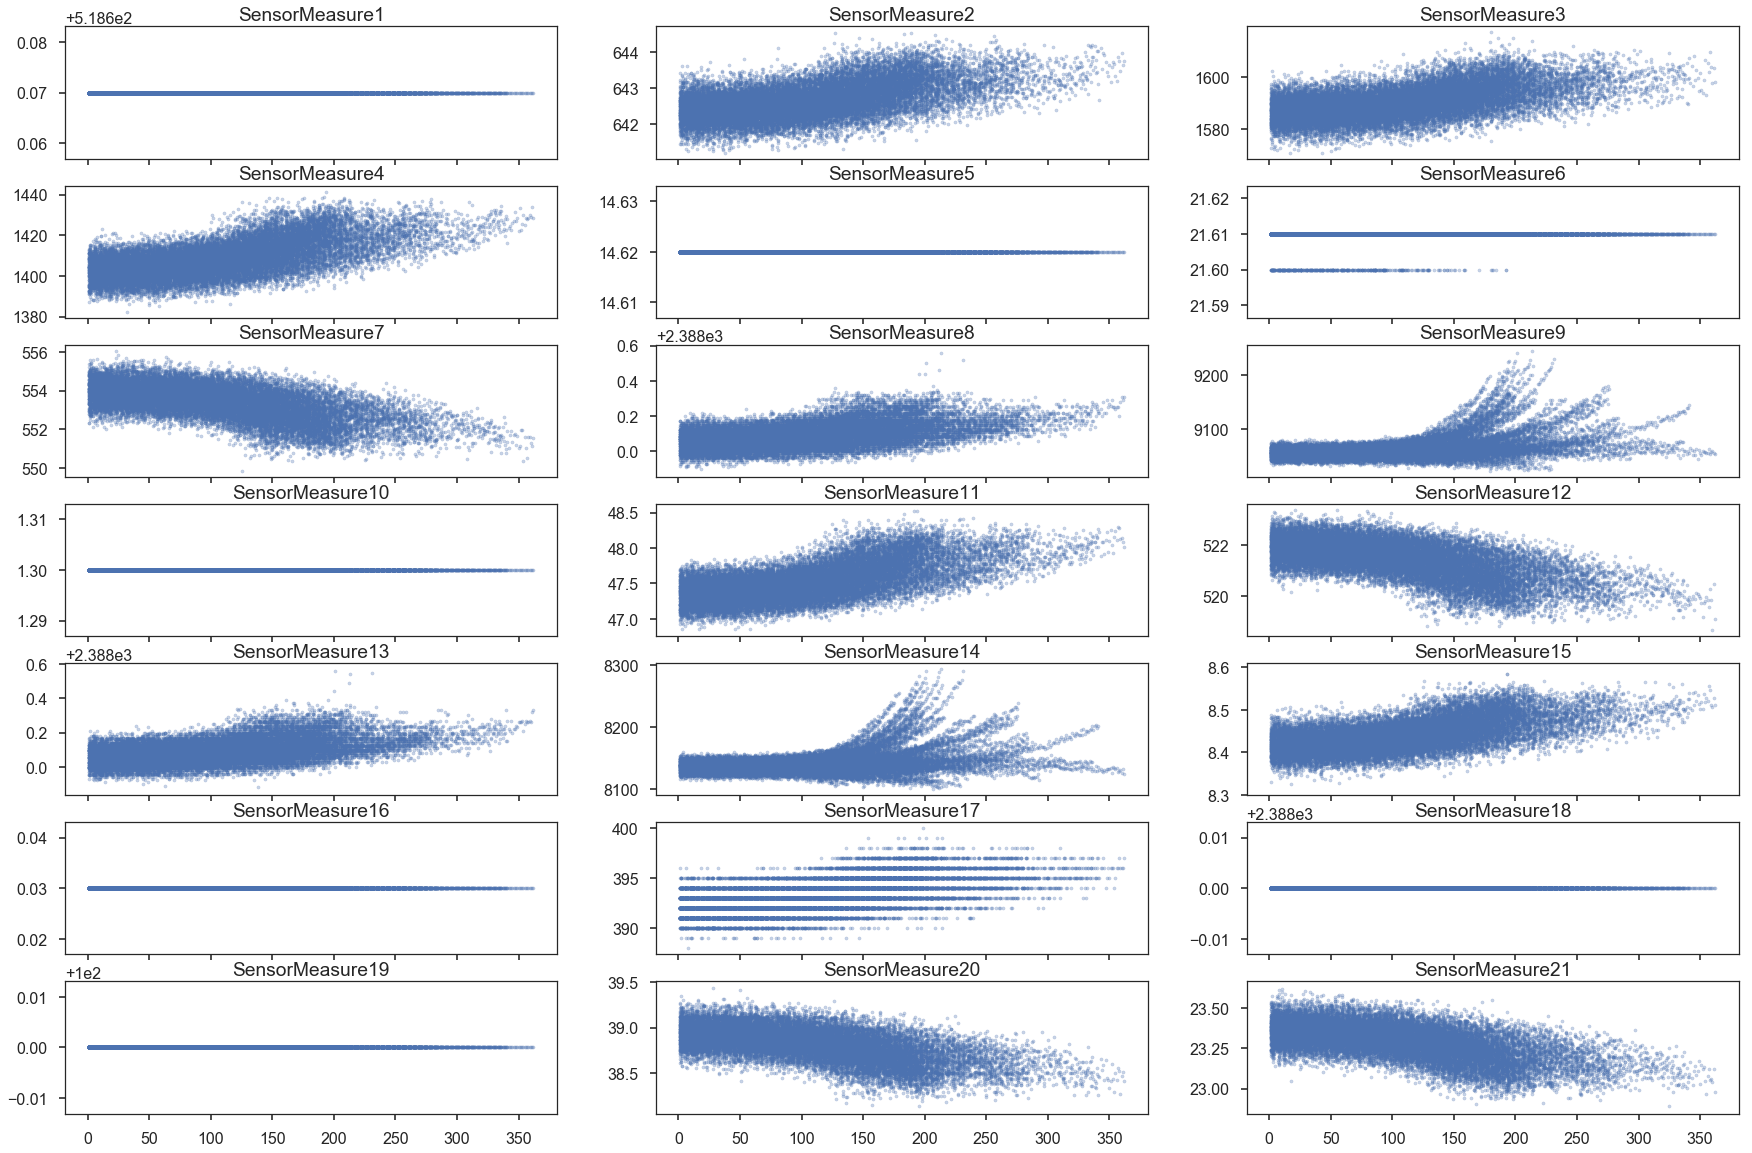

In [10]:
fig,ax=plt.subplots(7,3,figsize=(30,20),sharex=True)
c=0
for i in range(0,7):
    for j in range(0,3):
        ax[i,j].scatter(df_train.Cycle.values, df_train['SensorMeasure'+str(c+1)],s=10,alpha=0.3)
        ax[i,j].set_title('SensorMeasure'+str(c+1))
#         ax[i,j].axvline(0,c='r')
        c+=1

From the above plots we can see that some sensors have:
    1. have one or more discrete values (Sensor 1,5,6,10,16,18 and 19)
    2. have continuous values but those values are inconsistent (9 and 14)
    3. have  continuous values and are consistent (2,3,4,7,8,11,12,13,15,20 and 21)

Sensors have one or more discrete values do not show any increasing or decreasing behavior with degradation. These sensors will not enhance the model performance if they are included, but they may decrease the model performance and impose some load in model creation. Sensors have continuous values but those values are inconsistent may contain some hidden information due to its divergence at the end of system run. This type of information could not be discovered by mathematical models. Only sensors that have continuous and consistent values could be used in models development. These sensors show a continuous increasing or decreasing trend with system degradation. 11 sensors (sensors 2, 3, 4, 7, 8, 11, 12, 13, 15, 20 and 21) show this behavior in training data set. 

## Performance Assesment

As long as the decision was made to estimate RUL indirectly by first estimating damage of the system, then performing a suitable extrapolation to the damage progression and calculate RUL from the intersection of the extrapolated damage and the failure criterion (HI = 0). A good indication of system state is the health index which represents the system health. A **fully healthy** system has HI equal **1** while the **completely failed system** has HI equal **0**. System HI is varied between 0 and 1 according to its health. The process of calculating HI of the system is known as **performance assessment**.

The commonly used method for performance assessment is to assign health index of value 1 in the very early working cycles (first 30 cycles) in which the engine is almost 100% healthy and value 0 in the very last cycles (last 30 cycles) in which the engine almost arrive to its end of life.

In order to build a mathematical model to solve this problem, mathematical representation of data should be performed as follow. 

The selected eleven sensors can be considered as vector x = (x1, x2, …, x11). The sample set $\phi$ = {(x, y)} required to fit the models consists of selected samples x from the training data set with purposely assigned y (y here represents HI) value to them (0 or 1).

In [11]:
temp_df=df_train.copy()
temp_df['HI']=np.nan    #assigning na to every observation in HI column
a=0
#assigining 1 to first 30 observations of Unit 1
temp_df['HI'].iloc[0:30]=1
for i in range(1,101):
    a+=max(df_train.query('UnitNumber=='+str(i)).Cycle)
    #assigning zero to last 30 observations of every unit
    temp_df['HI'].iloc[a-30:a]=0
    #assigning one to first 30 observations of every unit
    temp_df['HI'].iloc[a:a+30]=1

C:\Users\musta\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [12]:
temp_df.query('UnitNumber==1').head()

UnitNumber  Cycle  OpSet1  OpSet2  OpSet3  SensorMeasure1  SensorMeasure2  SensorMeasure3  SensorMeasure4  SensorMeasure5  SensorMeasure6  SensorMeasure7  SensorMeasure8  SensorMeasure9  SensorMeasure10  SensorMeasure11  SensorMeasure12  SensorMeasure13  SensorMeasure14  SensorMeasure15  SensorMeasure16  SensorMeasure17  SensorMeasure18  SensorMeasure19  SensorMeasure20  SensorMeasure21  t_minus   HI
0           1      1 -0.0007 -0.0004   100.0          518.67          641.82         1589.70         1400.60           14.62           21.61          554.36         2388.06         9046.19              1.3            47.47           521.66          2388.02          8138.62           8.4195             0.03              392             2388            100.0            39.06          23.4190     -191  1.0
1           1      2  0.0019 -0.0003   100.0          518.67          642.15         1591.82         1403.14           14.62           21.61          553.75         2388.04         9044.07              1.3            47.49           522.28          2388.07          8131.49           8.4318             0.03              392             2388            100.0            39.00          23.4236     -190  1.0
2           1      3 -0.0043  0.0003   100.0          518.67          642.35         1587.99         1404.20           14.62           21.61          554.26         2388.08         9052.94              1.3            47.27           522.42          2388.03          8133.23           8.4178             0.03              390             2388            100.0            38.95          23.3442     -189  1.0
3           1      4  0.0007  0.0000   100.0          518.67          642.35         1582.79         1401.87           14.62           21.61          554.45         2388.11         9049.48              1.3            47.13           522.86          2388.08          8133.83           8.3682             0.03              392             2388            100.0            38.88          23.3739     -188  1.0
4           1      5 -0.0019 -0.0002   100.0          518.67          642.37         1582.85         1406.22           14.62           21.61          554.00         2388.06         9055.15              1.3            47.28           522.19          2388.04          8133.80           8.4294             0.03              393             2388            100.0            38.90          23.4044     -187  1.0

In [13]:
temp_df.query('UnitNumber==1').tail()

UnitNumber  Cycle  OpSet1  OpSet2  OpSet3  SensorMeasure1  SensorMeasure2  SensorMeasure3  SensorMeasure4  SensorMeasure5  SensorMeasure6  SensorMeasure7  SensorMeasure8  SensorMeasure9  SensorMeasure10  SensorMeasure11  SensorMeasure12  SensorMeasure13  SensorMeasure14  SensorMeasure15  SensorMeasure16  SensorMeasure17  SensorMeasure18  SensorMeasure19  SensorMeasure20  SensorMeasure21  t_minus   HI
187           1    188 -0.0067  0.0003   100.0          518.67          643.75         1602.38         1422.78           14.62           21.61          551.94         2388.31         9037.91              1.3            48.00           519.79          2388.23          8117.69           8.5207             0.03              396             2388            100.0            38.51          22.9588       -4  0.0
188           1    189 -0.0006  0.0002   100.0          518.67          644.18         1596.17         1428.01           14.62           21.61          550.70         2388.27         9044.55              1.3            48.08           519.58          2388.33          8117.51           8.5183             0.03              395             2388            100.0            38.48          23.1127       -3  0.0
189           1    190 -0.0027  0.0001   100.0          518.67          643.64         1599.22         1425.95           14.62           21.61          551.29         2388.29         9040.58              1.3            48.33           520.04          2388.35          8112.58           8.5223             0.03              398             2388            100.0            38.49          23.0675       -2  0.0
190           1    191 -0.0000 -0.0004   100.0          518.67          643.34         1602.36         1425.77           14.62           21.61          550.92         2388.28         9042.76              1.3            48.15           519.57          2388.30          8114.61           8.5174             0.03              394             2388            100.0            38.45          23.1295       -1  0.0
191           1    192  0.0009 -0.0000   100.0          518.67          643.54         1601.41         1427.20           14.62           21.61          551.25         2388.32         9033.22              1.3            48.25           520.08          2388.32          8110.93           8.5113             0.03              396             2388            100.0            38.48          22.9649        0  0.0

Dropping the columns (Sensors) which do not have consistent and continuous values

In [14]:
df_reg=temp_df.copy().dropna()  #keeping only 6000 observations having non NA values
df_reg.drop(['SensorMeasure1','SensorMeasure5','SensorMeasure6','SensorMeasure9','SensorMeasure10','SensorMeasure14','SensorMeasure16','SensorMeasure18','SensorMeasure18','SensorMeasure19'],inplace=True,axis=1)

In [15]:
df_corr=df_reg.copy().drop(['UnitNumber','Cycle','OpSet1','OpSet2','OpSet3','t_minus'],axis=1)

In [16]:
df_corr.head()

SensorMeasure2  SensorMeasure3  SensorMeasure4  SensorMeasure7  SensorMeasure8  SensorMeasure11  SensorMeasure12  SensorMeasure13  SensorMeasure15  SensorMeasure17  SensorMeasure20  SensorMeasure21   HI
0          641.82         1589.70         1400.60          554.36         2388.06            47.47           521.66          2388.02           8.4195              392            39.06          23.4190  1.0
1          642.15         1591.82         1403.14          553.75         2388.04            47.49           522.28          2388.07           8.4318              392            39.00          23.4236  1.0
2          642.35         1587.99         1404.20          554.26         2388.08            47.27           522.42          2388.03           8.4178              390            38.95          23.3442  1.0
3          642.35         1582.79         1401.87          554.45         2388.11            47.13           522.86          2388.08           8.3682              392            38.88          23.3739  1.0
4          642.37         1582.85         1406.22          554.00         2388.06            47.28           522.19          2388.04           8.4294              393            38.90          23.4044  1.0

Thus, the dataframe df_corr only has the relevant sensors and assigned HI index.

##### Assessing Sensor Correlation with the Response

In [17]:
df_corr_=df_corr.corr()
df_corr_[['HI']]

HI
SensorMeasure2  -0.803417
SensorMeasure3  -0.786383
SensorMeasure4  -0.863226
SensorMeasure7   0.841963
SensorMeasure8  -0.732725
SensorMeasure11 -0.873036
SensorMeasure12  0.851032
SensorMeasure13 -0.736443
SensorMeasure15 -0.836852
SensorMeasure17 -0.804861
SensorMeasure20  0.825518
SensorMeasure21  0.828740
HI               1.000000

The above dataframe represents correlation coefficient between the 11 sensors and HI. Since all of the sensors have a high correlation with the HI we will include all of them and discard none.

### Model Development

#### Linear Regression

To preserve the original patterns in the features, a linear regression model is used as performance assessment (HI prediction). Linear least square method is used for six linear regression models development. Equation below describes the mathematical representation of these models.


$y = \alpha +\sum_{i=1}^{i=N}\beta$ <sub>i</sub> x<sub>i</sub> +  $\epsilon $

Where, x = (x<sub>1</sub>, x2<sub></sub>, …, x<sub>N</sub>) is the N dimensional feature vector, y is the health indicator, ($\alpha, \beta$) = ($\alpha$, $\beta$<sub>1</sub>, $\beta$<sub>2</sub>, …, $\beta$<sub>N</sub>) is N+1 model parameters, and $\epsilon$ is the noise term. 

The training data set can be prepared by taking data from healthy and near-failure conditions of the system and assigning the corresponding outputs with 1 and 0 respectively as described in performance assessment step.

In [18]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#Fitting linear regression on the data
m = ols('HI ~ SensorMeasure2+SensorMeasure3+SensorMeasure4+SensorMeasure7+SensorMeasure8+SensorMeasure11+SensorMeasure12+SensorMeasure13+SensorMeasure15+SensorMeasure20+SensorMeasure21',df_corr).fit()
print (m.summary())

C:\Users\musta\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:                     HI   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     2628.
Date:                Tue, 14 Aug 2018   Prob (F-statistic):               0.00
Time:                        14:24:34   Log-Likelihood:                 933.14
No. Observations:                6000   AIC:                            -1842.
Df Residuals:                    5988   BIC:                            -1762.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -2361.8104    166.662    -

From the regression coefficients we can see that all parameters of every sensor are significant (having p values <0.05). Also, the model has a good R^2 of 0.82 which tells that Linear Regression fits the data very well.

Once the model parameters are obtained we can move onto the next phase of testing it on the test data.

## Loading the test dataframe

In [19]:
df_test=pd.read_csv('test_FD001.txt',delim_whitespace=True,names=input_file_column_names)
df_test.shape

(13096, 26)

The test dataframe also has 100 different engines and 13096 observations in total.

In [20]:
df_test.head()

UnitNumber  Cycle  OpSet1  OpSet2  OpSet3  SensorMeasure1  SensorMeasure2  SensorMeasure3  SensorMeasure4  SensorMeasure5  SensorMeasure6  SensorMeasure7  SensorMeasure8  SensorMeasure9  SensorMeasure10  SensorMeasure11  SensorMeasure12  SensorMeasure13  SensorMeasure14  SensorMeasure15  SensorMeasure16  SensorMeasure17  SensorMeasure18  SensorMeasure19  SensorMeasure20  SensorMeasure21
0           1      1  0.0023  0.0003   100.0          518.67          643.02         1585.29         1398.21           14.62           21.61          553.90         2388.04         9050.17              1.3            47.20           521.72          2388.03          8125.55           8.4052             0.03              392             2388            100.0            38.86          23.3735
1           1      2 -0.0027 -0.0003   100.0          518.67          641.71         1588.45         1395.42           14.62           21.61          554.85         2388.01         9054.42              1.3            47.50           522.16          2388.06          8139.62           8.3803             0.03              393             2388            100.0            39.02          23.3916
2           1      3  0.0003  0.0001   100.0          518.67          642.46         1586.94         1401.34           14.62           21.61          554.11         2388.05         9056.96              1.3            47.50           521.97          2388.03          8130.10           8.4441             0.03              393             2388            100.0            39.08          23.4166
3           1      4  0.0042  0.0000   100.0          518.67          642.44         1584.12         1406.42           14.62           21.61          554.07         2388.03         9045.29              1.3            47.28           521.38          2388.05          8132.90           8.3917             0.03              391             2388            100.0            39.00          23.3737
4           1      5  0.0014  0.0000   100.0          518.67          642.51         1587.19         1401.92           14.62           21.61          554.16         2388.01         9044.55              1.3            47.31           522.15          2388.03          8129.54           8.4031             0.03              390             2388            100.0            38.99          23.4130

In [21]:
#Dropping the irrerelavant sensors from the test dataframe
df_test_slice=df_test.drop(['SensorMeasure1','SensorMeasure5','SensorMeasure6','SensorMeasure9','SensorMeasure10','SensorMeasure14','SensorMeasure16','SensorMeasure18','SensorMeasure19','UnitNumber','Cycle','OpSet1','OpSet2','OpSet3'],axis=1)
df_test_slice.head()

SensorMeasure2  SensorMeasure3  SensorMeasure4  SensorMeasure7  SensorMeasure8  SensorMeasure11  SensorMeasure12  SensorMeasure13  SensorMeasure15  SensorMeasure17  SensorMeasure20  SensorMeasure21
0          643.02         1585.29         1398.21          553.90         2388.04            47.20           521.72          2388.03           8.4052              392            38.86          23.3735
1          641.71         1588.45         1395.42          554.85         2388.01            47.50           522.16          2388.06           8.3803              393            39.02          23.3916
2          642.46         1586.94         1401.34          554.11         2388.05            47.50           521.97          2388.03           8.4441              393            39.08          23.4166
3          642.44         1584.12         1406.42          554.07         2388.03            47.28           521.38          2388.05           8.3917              391            39.00          23.3737
4          642.51         1587.19         1401.92          554.16         2388.01            47.31           522.15          2388.03           8.4031              390            38.99          23.4130

#### Health Index Calculation

HI for each cycle in can be calculated by substituting with models parameters calculated by linear regression on the training data.

In [22]:
# Fitting the Linear Regression Model obtained from training data on the test set.
df_test['HI']=m.predict(df_test_slice)
df_test.head()

UnitNumber  Cycle  OpSet1  OpSet2  OpSet3  SensorMeasure1  SensorMeasure2  SensorMeasure3  SensorMeasure4  SensorMeasure5  SensorMeasure6  SensorMeasure7  SensorMeasure8  SensorMeasure9  SensorMeasure10  SensorMeasure11  SensorMeasure12  SensorMeasure13  SensorMeasure14  SensorMeasure15  SensorMeasure16  SensorMeasure17  SensorMeasure18  SensorMeasure19  SensorMeasure20  SensorMeasure21        HI
0           1      1  0.0023  0.0003   100.0          518.67          643.02         1585.29         1398.21           14.62           21.61          553.90         2388.04         9050.17              1.3            47.20           521.72          2388.03          8125.55           8.4052             0.03              392             2388            100.0            38.86          23.3735  0.932452
1           1      2 -0.0027 -0.0003   100.0          518.67          641.71         1588.45         1395.42           14.62           21.61          554.85         2388.01         9054.42              1.3            47.50           522.16          2388.06          8139.62           8.3803             0.03              393             2388            100.0            39.02          23.3916  1.087708
2           1      3  0.0003  0.0001   100.0          518.67          642.46         1586.94         1401.34           14.62           21.61          554.11         2388.05         9056.96              1.3            47.50           521.97          2388.03          8130.10           8.4441             0.03              393             2388            100.0            39.08          23.4166  0.897626
3           1      4  0.0042  0.0000   100.0          518.67          642.44         1584.12         1406.42           14.62           21.61          554.07         2388.03         9045.29              1.3            47.28           521.38          2388.05          8132.90           8.3917             0.03              391             2388            100.0            39.00          23.3737  0.929597
4           1      5  0.0014  0.0000   100.0          518.67          642.51         1587.19         1401.92           14.62           21.61          554.16         2388.01         9044.55              1.3            47.31           522.15          2388.03          8129.54           8.4031             0.03              390             2388            100.0            38.99          23.4130  0.968395

### Plotting the Predicted Health Indexes

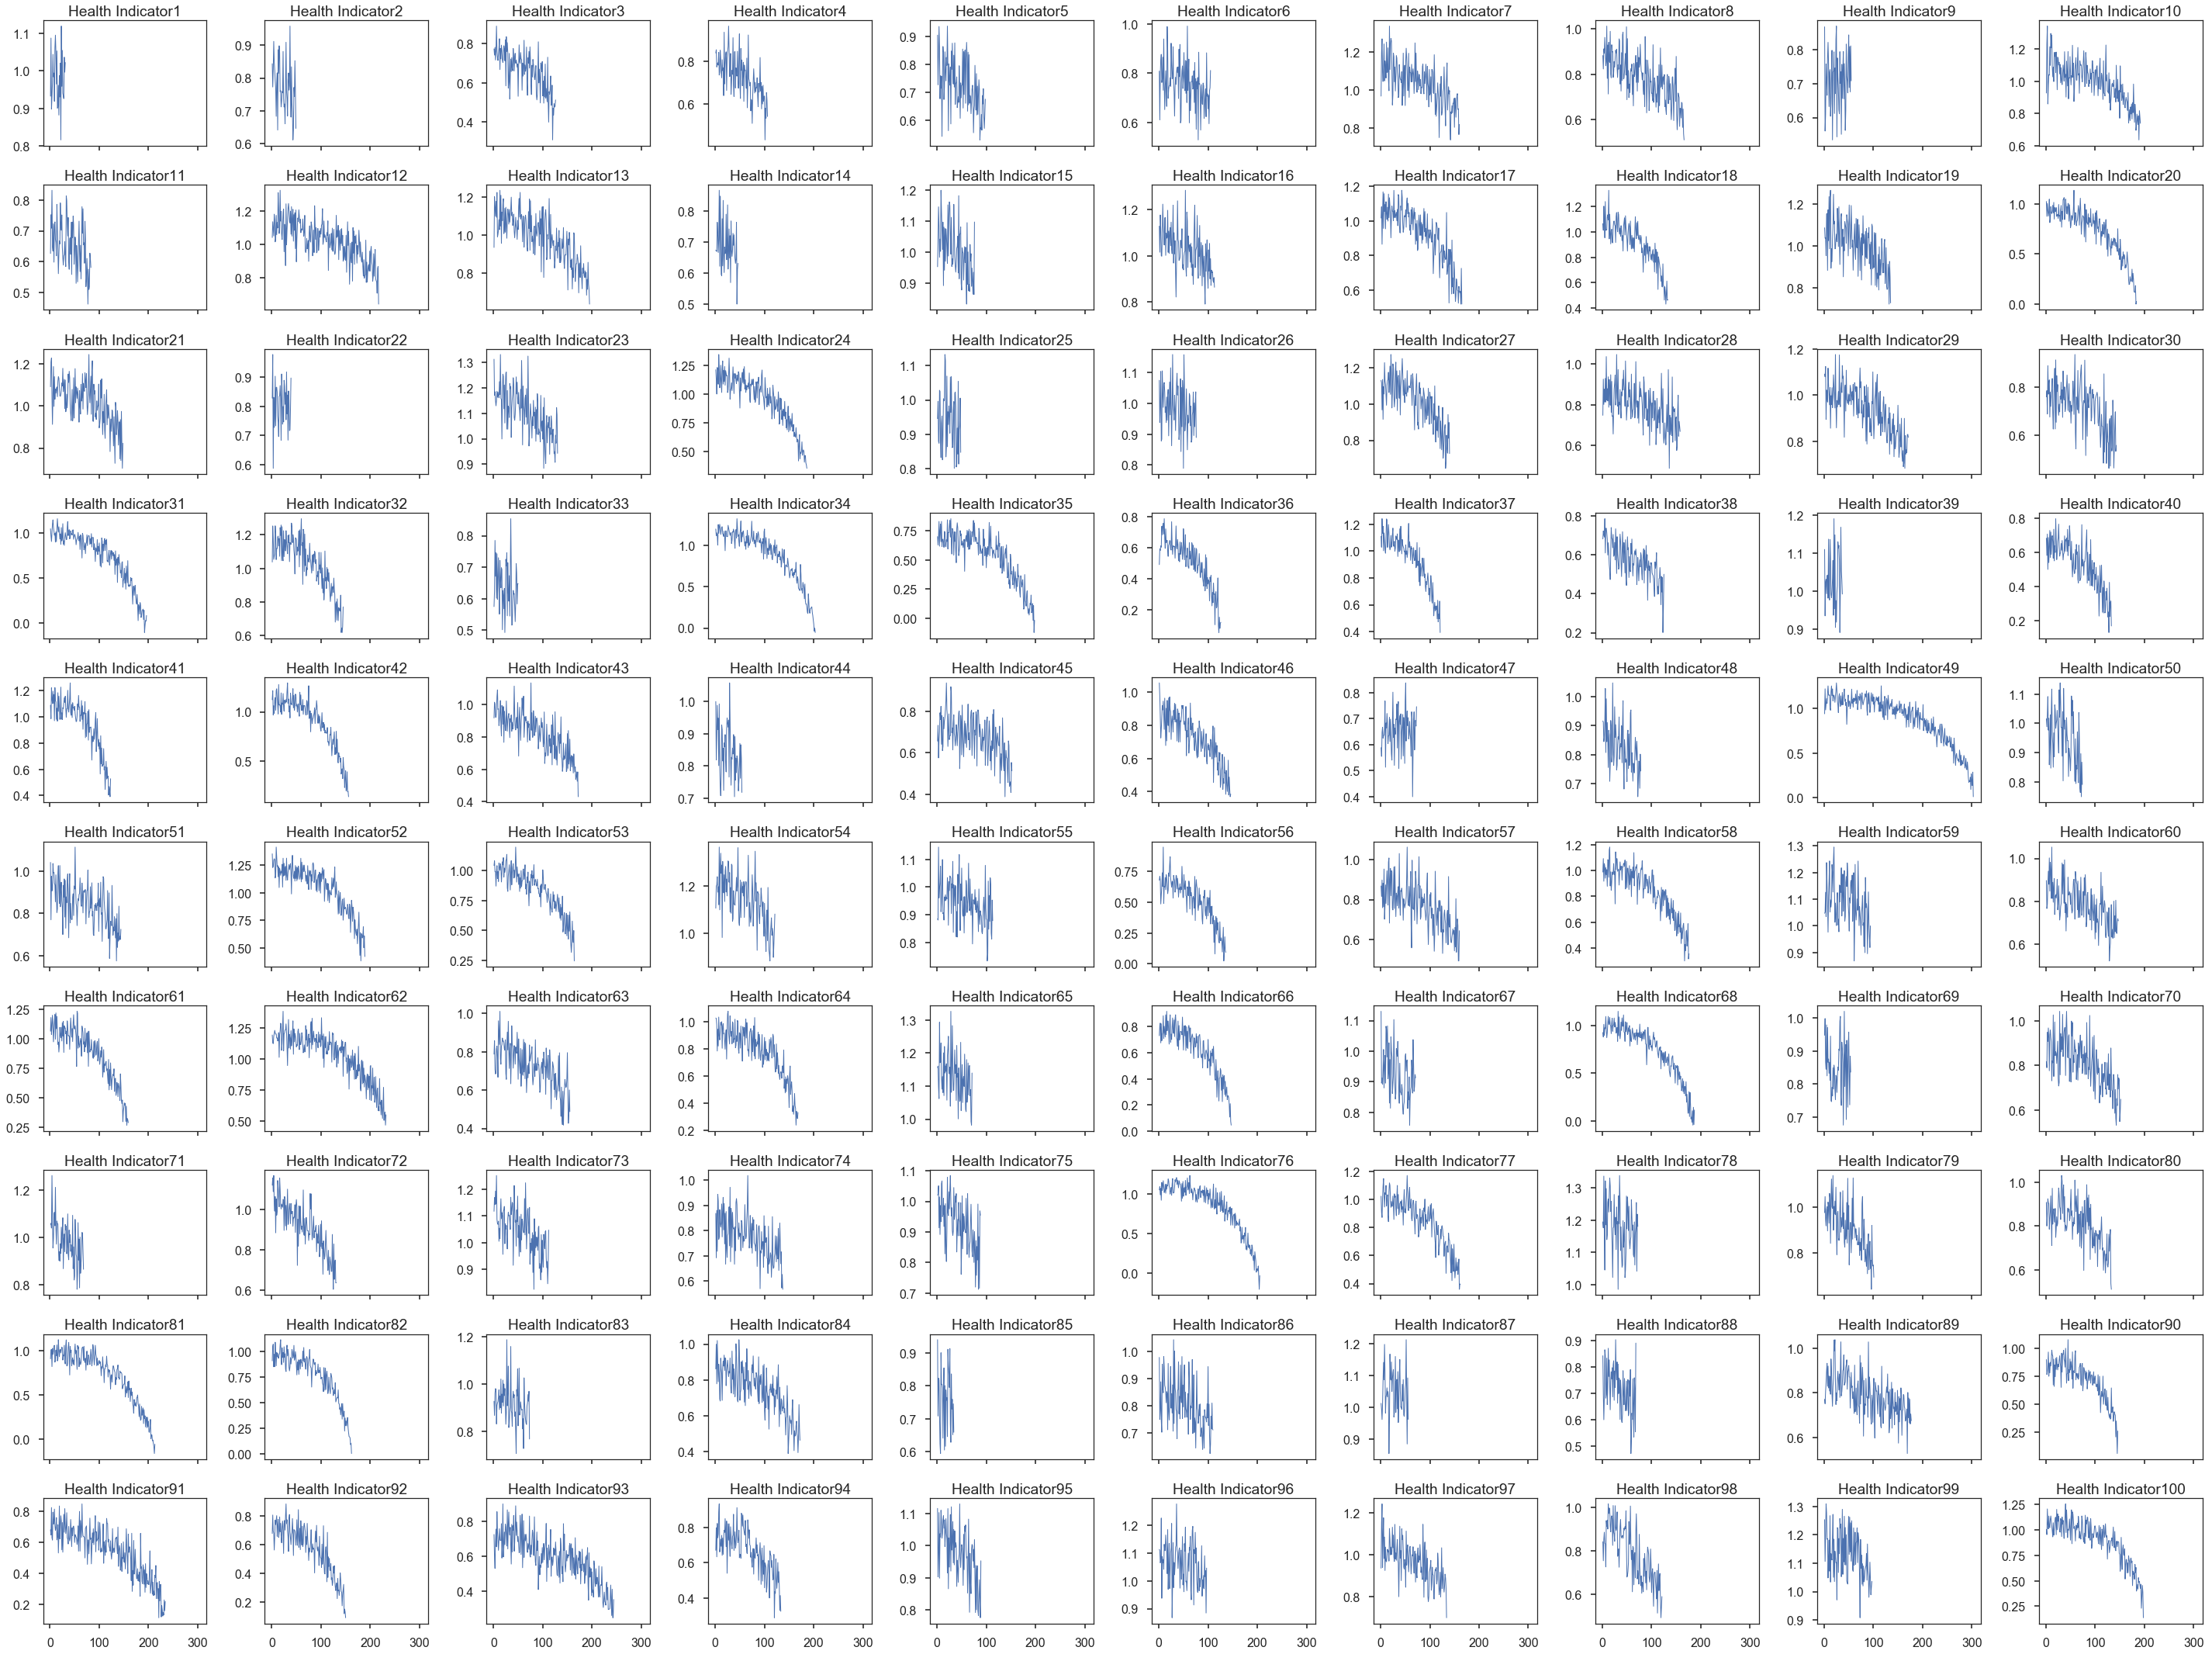

In [23]:
fig,ax=plt.subplots(10,10,figsize=(40,30),sharex=True)
c=1

for i in range(0,10):
    for j in range(0,10):
        df_u1=df_test.query('UnitNumber=='+str(c))
        ax[i,j].plot(df_u1['Cycle'],df_u1.HI.values,linewidth=1)
        ax[i,j].set_title('Health Indicator'+str(c))
        c+=1

plt.tight_layout()
plt.show()

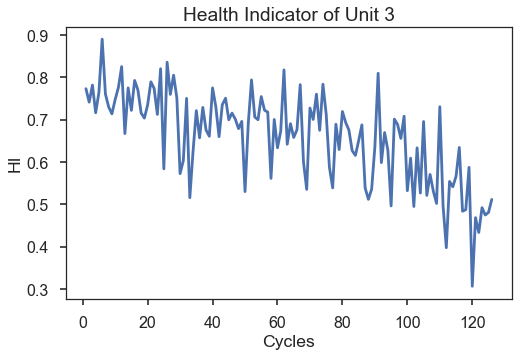

In [24]:
fig,ax=plt.subplots(1,1,figsize=(8,5),sharex=True)
df_u1=df_test.query('UnitNumber==3')
ax.plot(df_u1['Cycle'],df_u1.HI.values )
ax.set_title('Health Indicator of Unit 3')
ax.set(xlabel='Cycles',ylabel='HI')
plt.show()

As shown , health index shows a degradation pattern. Fluctuation in health index is due to between flight maintenance operations, which may lead to improved performance in subsequent flights. Also, it is noticed that health index data need to be smoothed first before extrapolation to
give better results.

### Smoothing the Health Indicators

We will smooth the Health Index first before extrapolation to give better results. Simple Moving Average smoothing is done for all the 100 engines with a rolling window of 5.

In [25]:
# A function to calculate moving average of the dataframe
def moving_average(df,un):
    temp_df=df.query('UnitNumber=='+str(un))
    rolling=temp_df['HI'].rolling(window=5)
    rolling_mean=rolling.mean()
    return rolling_mean

In [26]:
import itertools
all_rolling_means=[moving_average(df_test,i) for i in range(1,101)]
df_test=df_test.assign(MA_HI=list(itertools.chain.from_iterable(all_rolling_means)))
df_test.dropna(inplace=True)
df_test.head()

UnitNumber  Cycle  OpSet1  OpSet2  OpSet3  SensorMeasure1  SensorMeasure2  SensorMeasure3  SensorMeasure4  SensorMeasure5  SensorMeasure6  SensorMeasure7  SensorMeasure8  SensorMeasure9  SensorMeasure10  SensorMeasure11  SensorMeasure12  SensorMeasure13  SensorMeasure14  SensorMeasure15  SensorMeasure16  SensorMeasure17  SensorMeasure18  SensorMeasure19  SensorMeasure20  SensorMeasure21        HI     MA_HI
4           1      5  0.0014  0.0000   100.0          518.67          642.51         1587.19         1401.92           14.62           21.61          554.16         2388.01         9044.55              1.3            47.31           522.15          2388.03          8129.54           8.4031             0.03              390             2388            100.0            38.99          23.4130  0.968395  0.963156
5           1      6  0.0012  0.0003   100.0          518.67          642.11         1579.12         1395.13           14.62           21.61          554.22         2388.00         9050.96              1.3            47.26           521.92          2388.08          8127.46           8.4238             0.03              392             2388            100.0            38.91          23.3467  1.044252  0.985516
6           1      7 -0.0000  0.0002   100.0          518.67          642.11         1583.34         1404.84           14.62           21.61          553.89         2388.05         9051.39              1.3            47.31           522.01          2388.06          8134.97           8.3914             0.03              391             2388            100.0            38.85          23.3952  0.983960  0.964766
7           1      8  0.0006 -0.0000   100.0          518.67          642.54         1580.89         1400.89           14.62           21.61          553.59         2388.05         9052.86              1.3            47.21           522.09          2388.06          8125.93           8.4213             0.03              393             2388            100.0            39.05          23.3224  0.994242  0.984089
8           1      9 -0.0036  0.0000   100.0          518.67          641.88         1593.29         1412.28           14.62           21.61          554.49         2388.06         9048.55              1.3            47.37           522.03          2388.05          8134.15           8.4353             0.03              391             2388            100.0            39.10          23.4521  0.918720  0.981914

Plotting the moving averages

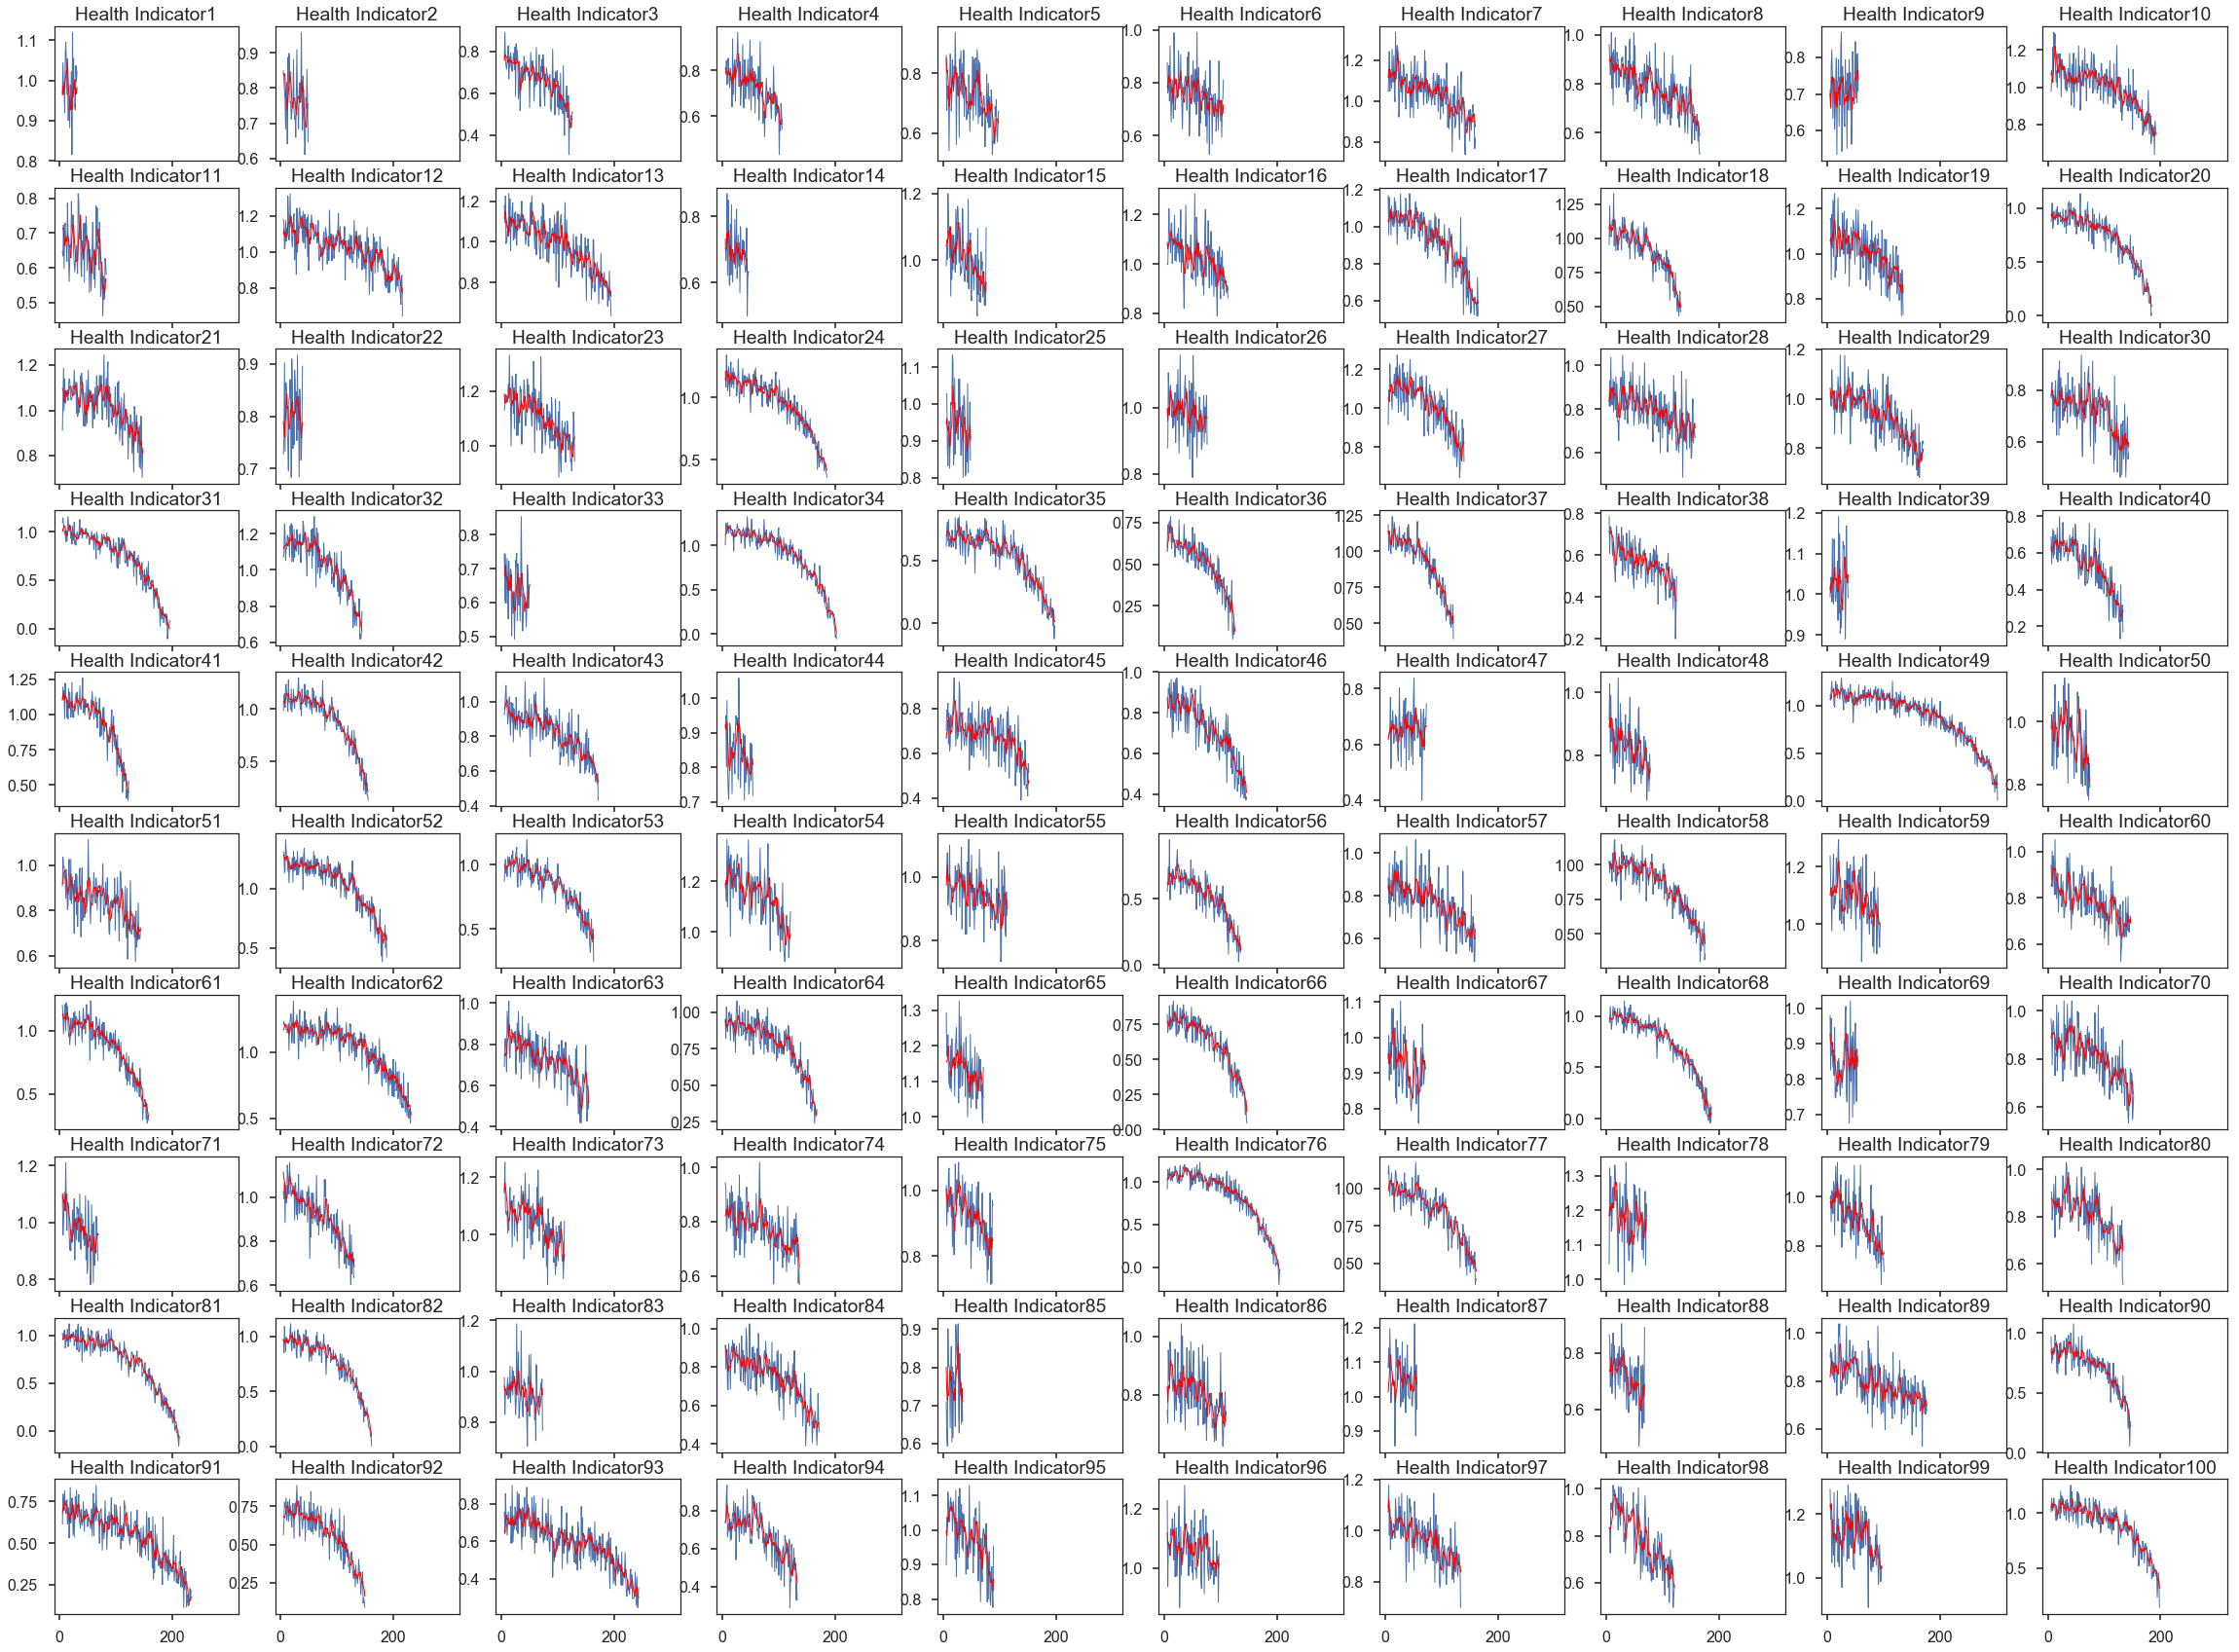

In [27]:
fig,ax=plt.subplots(10,10,figsize=(40,30),sharex=True)
c=1
for i in range(0,10):
    for j in range(0,10):
        df_u1=df_test.query('UnitNumber=='+str(c))
        ax[i,j].plot(df_u1['Cycle'],df_u1.HI.values,linewidth=1)
        ax[i,j].plot(df_u1['Cycle'],df_u1.MA_HI.values,linewidth=1,color='r')
        ax[i,j].set_title('Health Indicator'+str(c))
        c+=1

Text(0.5,1,'Health Indicator')

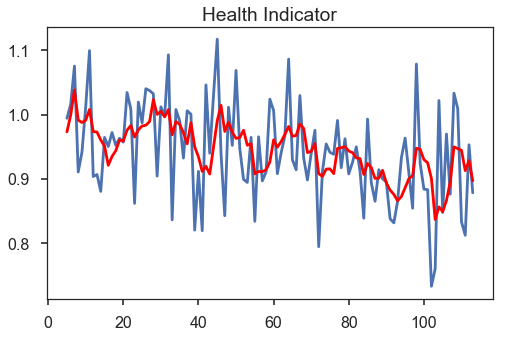

In [28]:
fig,ax=plt.subplots(1,1,figsize=(8,5),sharex=True)
df_u1=df_test.query('UnitNumber==55')
ax.plot(df_u1['Cycle'],df_u1.HI.values)
ax.plot(df_u1['Cycle'],df_u1.MA_HI.values,color='r')
ax.set_title('Health Indicator')

# Remaining Useful Life (RUL) Calculation

### Cost Function

To understand the cost(scoring) function, imagine that we’ve trained a model on the data above, and are now using it in production to tell us when we should bring our airplanes in for service. If our model happens to underestimate the true RUL of a particular engine, we might bring it in for service too early when it could have operated for a bit longer without issue. What would happen if our model was to overestimate the true RUL instead? In that case, we might allow a degrading aircraft to keep flying, and risk catastrophic engine failure. Clearly, the costs of these two outcomes are not the same.

![Cost_graph](Images/Cost_graph.PNG)

To capture the different costs associated with different kinds of incorrect predictions, one approach is to use an asymmetric cost function for evaluation. Typically, such a function is applied to the output of a model (RUL predictions in our case) and returns the total “penalty” associated with that model’s predictions. When evaluating multiple models, the one with the lowest cost is preferred.

In our case, a good option suggested in the literature is the function J below:

![Cost_fuction](Images/Cost.PNG)

Where N is the total number of engines under evaluation, and $\hat{y}_{i}$ and $y_{i}$ are the predicted and true values for the RUL of an engine i, respectively. As shown by the plot of J in the figure above, this function correctly penalizes overestimates ($\hat{y}_{i}-y_{i}\geq0$) more than underestimates ($\hat{y}_{i}-y_{i}<0$) of the true RUL, thereby capturing our intuition about the different penalties associated with each.

In [29]:
def scoring_function(error):
    if error>=0:
        s=np.exp(error/10)-1
        return s
    else:
        s=np.exp(-error/13)-1
        return s

### 1. Polynomial Curve Fitting

After HI data smoothing for each engine in test data set is performed,polynomial curve fitting is done. Polynomial equations obtained are used for curve extrapolation until HI value reaches zero i.e. HI curve intersects with the time index axis. RUL is calculated by subtracting the time at the point of prediction (t<sub>i</sub>) from the time at engine end of life (t<sub>EOL</sub>).

** $RUL$= (t<sub>EOL</sub>) - (t<sub>i</sub>)**



In [30]:
#Loading the RUL vector as a list

with open('RUL_FD001.txt', 'r') as f:
    x = f.readlines()

RUL=[int(x[i].split(' ')[0]) for i in range(100)]

In [31]:
#Fitting the Polynomial to every engine

degrees    = range(6)
degree_fit = []
final_score=[]
estimated_rul_dict={}
roots_dict={}

for i in range(1,101):
    
    #Creating a sub-dataframe for every engine
    uniti = df_test.query('UnitNumber=='+str(i))
    
    score      = np.empty(len(degrees))
    
    estimated_rul_dict['UnitNumber'+str(i)] = {}
    roots_dict['UnitNumber'+str(i)] = {}
    
    for d in degrees:
        
        poly_params = np.polyfit(uniti['Cycle'],uniti['MA_HI'],d)       #Fit data to the polynomial
        poly_       = np.poly1d(poly_params)                            #Construct the polynomial
        
        roots = poly_.r                                                 #Calculating roots of the polynomial
        roots = roots[np.isreal(roots)].real                            #Filtering out the real roots
        roots = roots[roots>0]                                          #Filtering out the positive roots
        
        if roots.shape[0]==1:
            pred_rul = roots - max(uniti['Cycle'])                      #Calculating the remaining useful life
        
            errors = pred_rul - RUL[i-1] 
        
            score[d]=scoring_function(errors)
            
            estimated_rul_dict['UnitNumber'+str(i)][scoring_function(errors).item()] = pred_rul.item()
            
            roots_dict['UnitNumber'+str(i)][scoring_function(errors).item()] = roots.item()            
            
        elif roots.shape[0]>1:
            pred_rul = roots[0] - max(uniti['Cycle'])
            
            errors = pred_rul - RUL[i-1]
            
            score[d]=scoring_function(errors)
            
            estimated_rul_dict['UnitNumber'+str(i)][scoring_function(errors).item()] = pred_rul.item()
       
            roots_dict['UnitNumber'+str(i)][scoring_function(errors).item()] = roots[0].item()
        
        else:
            score[d]=scoring_function(7000)
        
    
    degree_fit.append(np.argmin(score))
    final_score.append(np.min(score))


C:\Users\musta\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


In [32]:
predicted_ruls=[]
for i in estimated_rul_dict.keys():
    predicted_ruls.append(estimated_rul_dict[i][min(estimated_rul_dict[i].keys())])
    
roots_list=[]
for i in roots_dict.keys():
    roots_list.append(roots_dict[i][min(roots_dict[i].keys())])

#### Plotting the number of degrees that were fit

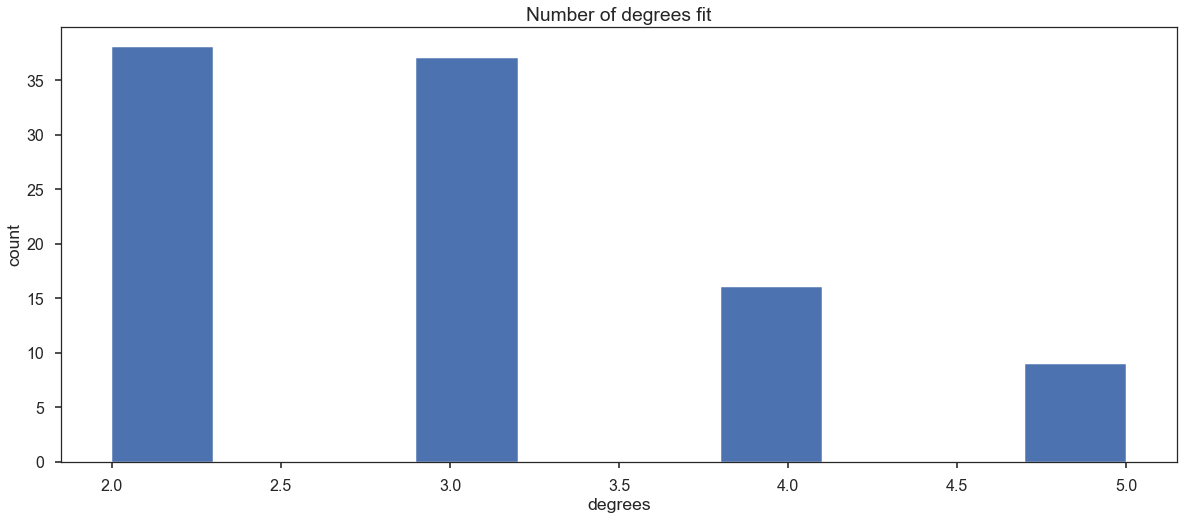

In [33]:
fig,ax=plt.subplots(1,1,figsize=(20,8))

ax.hist(degree_fit,edgecolor='white')
ax.set(xlabel='degrees',ylabel='count',title='Number of degrees fit')

plt.show()

Thus, we can see that :
* 38 engines fitted to 2<sup>nd</sup> order polynomial 
* 37 engines fitted to 3<sup>rd</sup> order polynomial 
* 16 engines fitted to 4<sup>th</sup> order polynomial
* 9 engines fitted to 6<sup>th</sup> order polynomial.

In [34]:
#Creating a metric dataframe having Engine Number, the degree to which it was fit and its score
metric_poly=pd.DataFrame({'UnitNumber':list(range(1,101)),'Degree':degree_fit,
                     'Score':final_score,'Predicted_RUL':predicted_ruls,'Actual_RUL':RUL,
                     'Polynomial_root':roots_list},
                    columns=['UnitNumber','Degree','Score','Predicted_RUL','Actual_RUL',
                            'Polynomial_root'])
metric_poly

UnitNumber  Degree         Score  Predicted_RUL  Actual_RUL  Polynomial_root
0            1       4  2.065900e+03      12.760530         112        43.760530
1            2       4  4.637671e-01      93.046827          98       142.046827
2            3       2  6.890248e+00      89.656276          69       215.656276
3            4       2  4.530205e+00      99.102249          82       205.102249
4            5       2  4.458767e+00     107.972229          91       205.972229
5            6       2  2.044184e+03     169.232428          93       274.232428
6            7       3  1.860167e+01     120.756148          91       280.756148
7            8       3  5.012610e-01      99.063054          95       265.063054
8            9       5  2.276677e+03     188.309114         111       243.309114
9           10       3  5.335109e+00      72.000610          96       264.000610
10          11       2  5.852092e-01     101.607164          97       184.607164
11          12       3  9.846084e-02     122.779170         124       339.779170
12          13       4  1.445928e-01      93.244364          95       288.244364
13          14       2  3.838916e+01     143.734906         107       189.734906
14          15       5  2.985200e+01      38.420380          83       114.420380
15          16       3  1.781844e+00      70.699516          84       183.699516
16          17       3  4.866877e-02      50.475215          50       215.475215
17          18       3  2.944687e-02      28.290216          28       161.290216
18          19       4  1.055655e+00      77.632270          87       212.632270
19          20       2  3.327884e-01      18.872733          16       202.872733
20          21       3  4.921452e+00      74.785817          57       222.785817
21          22       2  2.985697e+01      66.418286         111       105.418286
22          23       5  6.213251e+00      87.313043         113       217.313043
23          24       5  5.802938e-01      24.576108          20       210.576108
24          25       2  4.827714e+02      64.639037         145       112.639037
25          26       2  2.974119e+04     222.003219         119       298.003219
26          27       4  3.506354e+00      46.428650          66       186.428650
27          28       5  8.357922e+00     119.362233          97       277.362233
28          29       3  5.199543e+01     129.702057          90       300.702057
29          30       2  1.662720e+00     102.268473         115       245.268473
30          31       2  1.069295e-01       6.679330           8       202.679330
31          32       4  1.270236e+00      37.341512          48       182.341512
32          33       3  1.443290e+02      41.273000         106        91.273000
33          34       3  1.303740e-01       5.406869           7       208.406869
34          35       2  3.413204e-01       7.182492          11       205.182492
35          36       2  2.559848e-01      21.279200          19       147.279200
36          37       3  8.887531e-01      27.359169          21       148.359169
37          38       3  1.330661e+00      39.000027          50       164.000027
38          39       4  1.433288e+04      17.585040         142        54.585040
39          40       3  5.264955e-02      27.332965          28       160.332965
40          41       3  1.907833e-01      19.746114          18       142.746114
41          42       4  5.315207e-02      10.517876          10       166.517876
42          43       3  3.278403e+00      73.535798          59       245.535798
43          44       5  8.318228e-01     101.130950         109       155.130950
44          45       2  4.178523e-01     109.461137         114       261.461137
45          46       3  4.368311e-01      50.624401          47       196.624401
46          47       2  1.626700e+00     122.445533         135       195.445533
47          48       3  2.377093e+01      50.274281          92       128.274281
48          49       3  1.016741e-0

We can see that engines 87,55 has an unusually high score of 2.62e+13 and 1.26e+11. This happens because the HI of these engines do not show any degradation pattern, which makes it very difficult to fit a polynomial.

Removing Units 87 and 55 and plotting the scatter plot

#### Plotting the Score Function

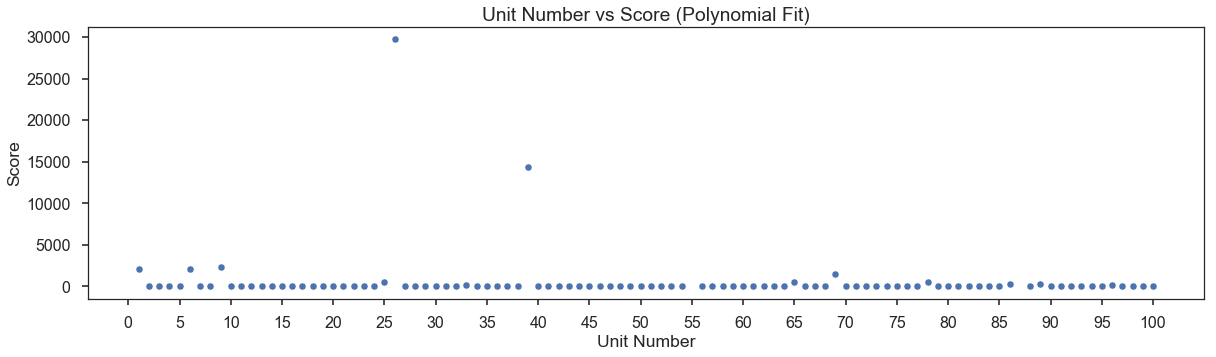

In [35]:
fig,ax=plt.subplots(1,1,figsize=(20,5))

ax.scatter(metric_poly[(metric_poly['UnitNumber']!=87) & (metric_poly['UnitNumber']!=55)].UnitNumber, 
           metric_poly[(metric_poly['UnitNumber']!=87) & (metric_poly['UnitNumber']!=55)].Score,edgecolor='white',
          s=50)

ax.set_xticks(np.arange(0,105,5))
ax.set(xlabel='Unit Number',ylabel='Score',title='Unit Number vs Score (Polynomial Fit)')

plt.show()

From the above plot we can clearly see that, Unit Number 26 and 39 have high scores of 29741 and 14339 respectively.

For rest for the engines the Polynmial fit methods tends to perform reasonably well.

### Plotting Actual vs Predicted RUL

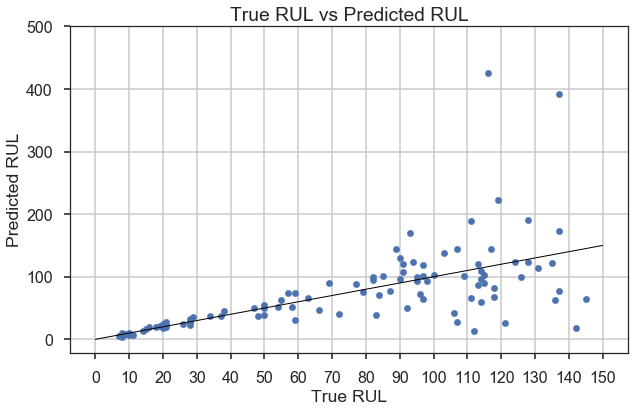

In [36]:
fig,ax=plt.subplots(1,1,figsize=(10,6))

ax.scatter(metric_poly.Actual_RUL,metric_poly.Predicted_RUL, s=40)
ax.grid()
ax.plot(np.arange(0,160,10),np.arange(0,160,10),c='black',linewidth=1)
ax.set(xlabel='True RUL',ylabel='Predicted RUL',title='True RUL vs Predicted RUL')
ax.set_xticks(np.arange(0,160,10))
ax.set_yticks(np.arange(0,600,100))
plt.show()

From the above scatter plot we can clearly see that polynomial fit tends to capture the characteristics of the data reasonably well. In particular, when the true RUL value is not very high (~10 to 60) they exhibit a high density of predictions close to the diagonal. The model tends to perform as prediction value of RUL increases i.e larger forecasting periods. 

RUL is 98
The root at degree 0 is: []
Pred RUL at degree 1 d is: [ 429.63970378]
Error at degree 1 d is: [ 331.63970378]
Score at degree 1 d is: [  2.52888647e+14]
The root at degree 1 is: [ 478.63970378]
The root at degree 2 is: []
Pred RUL at degree 3 d is: [ 29.66470426]
Error at degree 3 d is: [-68.33529574]
Score at degree 3 d is: [ 190.82072474]
The root at degree 3 is: [ 78.66470426]
Pred RUL at degree 4 d is: 93.0468269279
Error at degree 4 d is: -4.95317307208
Score at degree 4 d is: 0.463767092758
The root at degree 4 is: [ 142.04682693   90.82486389]
The root at degree 5 is: []


Text(0.5,1,'Health Indicator')

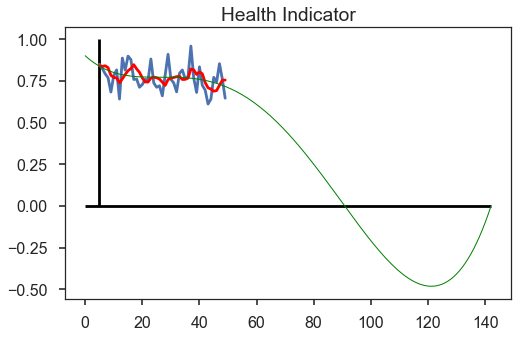

In [55]:
u=2
unit3=df_test.query('UnitNumber=='+str(u))
print('RUL is '+str(RUL[u-1]))
rul_dict={}
for i in range(6):
    poly_params=np.polyfit(unit3['Cycle'],unit3['MA_HI'],i)   #Fit the data to the polynomial
    poly_1_test=np.poly1d(poly_params)                             #Consruct the polynomial

    roots=poly_1_test.r
    roots
    roots=roots[np.isreal(roots)].real
    roots=roots[roots>0]
    
    if roots.shape[0]==1:
            pred_rul = roots - max(unit3['Cycle'])                      #Calculating the remaining useful life
        
            er = pred_rul - RUL[u-1] 
        
            sc=scoring_function(er)
            
            rul_dict[sc.item()]=pred_rul
            print('Pred RUL at degree ' +str(i)+' d is:',pred_rul)
            print('Error at degree ' +str(i)+' d is:',er)
            print('Score at degree '+str(i)+' d is:',sc)
    elif roots.shape[0]>1:
            pred_rul = roots[0] - max(unit3['Cycle'])                      #Calculating the remaining useful life
        
            er = pred_rul - RUL[u-1] 
        
            sc=scoring_function(er)
            
            rul_dict[sc.item()]=pred_rul
            print('Pred RUL at degree ' +str(i)+' d is:',pred_rul)
            print('Error at degree ' +str(i)+' d is:',er)
            print('Score at degree '+str(i)+' d is:',sc)
        
    print('The root at degree '+str(i)+' is:',roots)

fig,ax=plt.subplots(1,1,figsize=(8,5),sharex=True)
ax.plot(unit3['Cycle'],unit3.HI.values)
ax.plot(unit3['Cycle'],unit3.MA_HI.values,color='r')

poly_params_test=np.polyfit(unit3['Cycle'],unit3['MA_HI'], metric_poly.Degree[u-1])   #Fit the data to the polynomial
poly_1_test_2=np.poly1d(poly_params_test)

xPoly = np.arange(0,metric_poly.Polynomial_root.iloc[u-1])                # Generate 100 x-coordinates from 0 to max(x)
yPoly = poly_1_test_2(xPoly)

ax.plot(np.arange(0,metric_poly.Polynomial_root.iloc[u-1]),yPoly,linewidth=1,color='g')

ax.vlines(min(unit3['Cycle']),0,1)
ax.hlines(0,0,metric_poly.Polynomial_root.iloc[u-1])
ax.set_title('Health Indicator')


### Plotting the Polynomial Fit

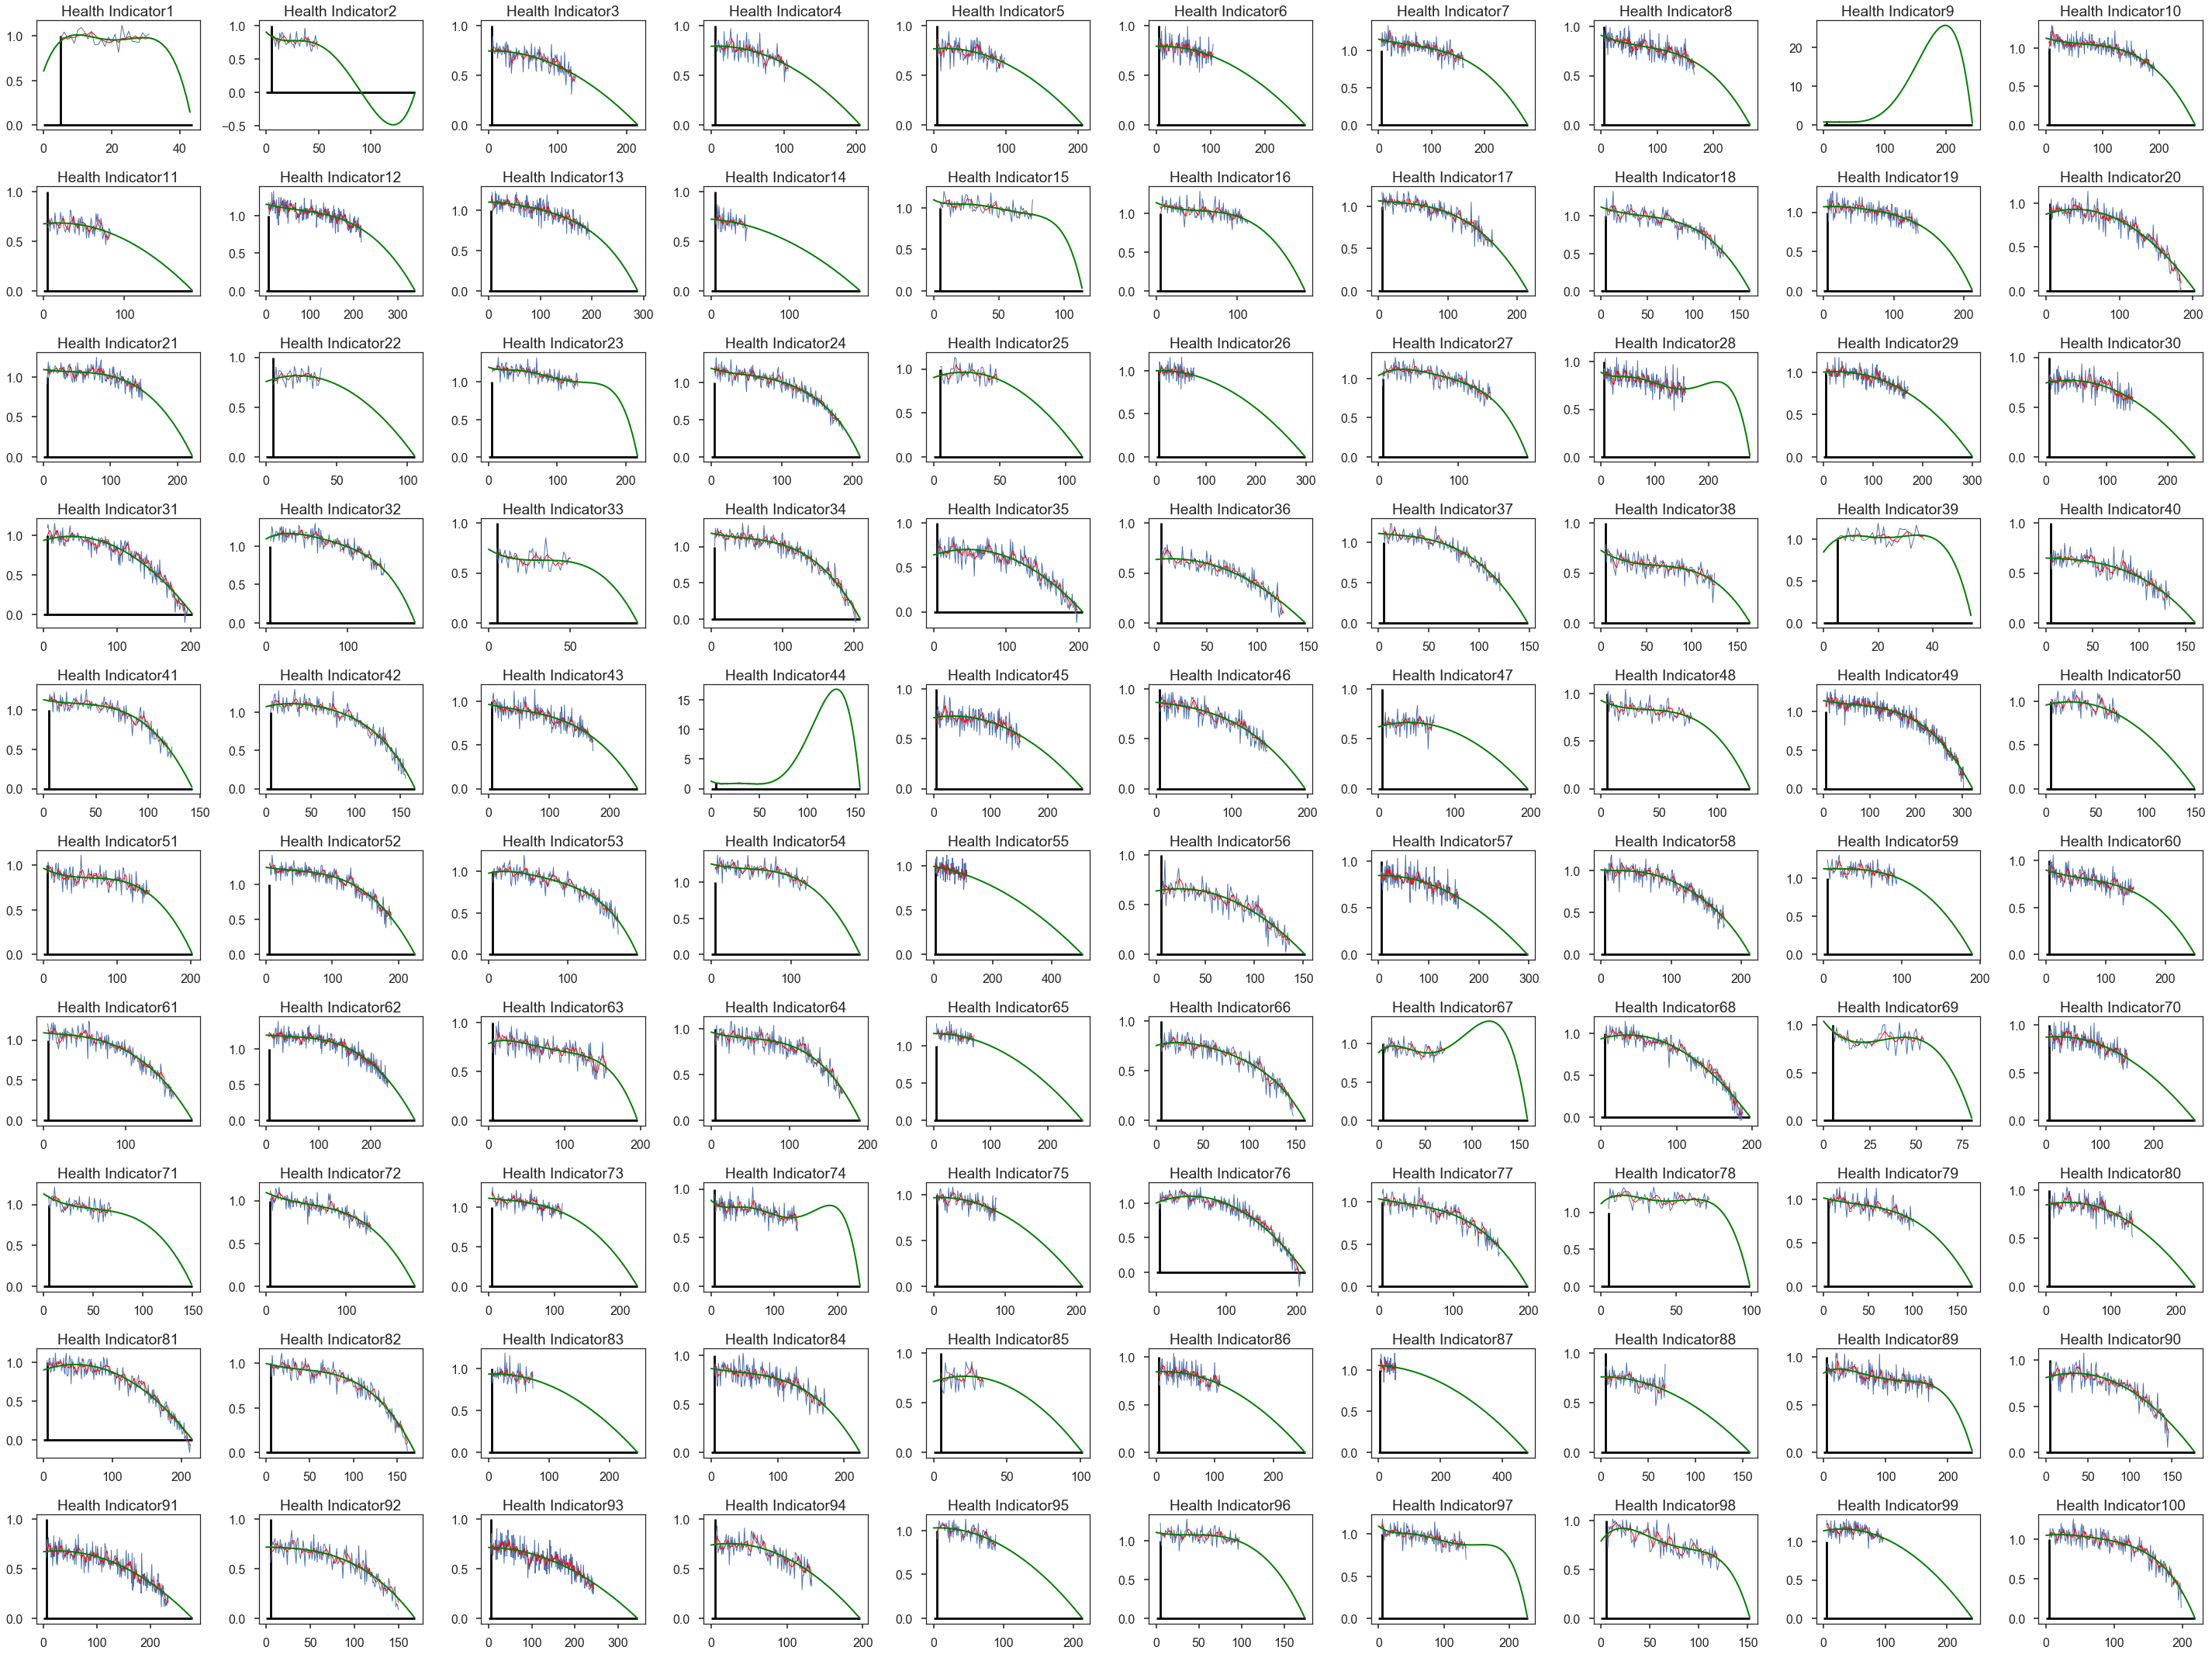

In [46]:
fig,ax=plt.subplots(10,10,figsize=(40,30))
c=1
for i in range(0,10):
    for j in range(0,10):
        
        df_u1=df_test.query('UnitNumber=='+str(c))
        ax[i,j].plot(df_u1['Cycle'],df_u1.HI.values,linewidth=1)
        ax[i,j].plot(df_u1['Cycle'],df_u1.MA_HI.values,linewidth=1,color='r')
        
        #Fitting the polynomial
        poly_params=np.polyfit(df_u1['Cycle'],df_u1['MA_HI'], metric_poly.Degree[c-1])   #Fit the data to the polynomial
        poly_1=np.poly1d(poly_params)                             #Consruct the polynomial
        
        xPoly = np.arange(0,metric_poly.Polynomial_root.iloc[c-1])                # Generate 100 x-coordinates from 0 to max(x)
        yPoly = poly_1(xPoly)                    # Use the polynomial to calculate the y-coordinates
        
        #Plotting the Polynomial
        ax[i,j].plot(np.arange(0,metric_poly.Polynomial_root.iloc[c-1]),yPoly,linewidth=2,color='g')
        ax[i,j].set_title('Health Indicator'+str(c))
        
        ax[i,j].vlines(min(df_u1['Cycle']),0,1)
        ax[i,j].hlines(0,0,metric_poly.Polynomial_root.iloc[c-1])
        c+=1
        
plt.tight_layout()

Here, the blue line is the actual HI index, the red line is the smoothed HI value and the green line is the polynomial which is fit to the series.